In [ ]:
# Random Forest에 사용할 모듈 호출, 데이터 로딩
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
housing = pd.read_csv('housing.csv')

In [ ]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
# 1) 데이터 준비 : 변수 설정, 학습/테스트 분리
y_target = housing['MEDV']
X_data = housing.drop(['MEDV'], axis = 1, inplace = False)

X_train, X_test, y_train,  y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state=42)

In [ ]:
# 2) 모형 세팅과 훈련
rf = RandomForestRegressor(random_state = 42, n_estimators = 1000)

In [ ]:
# 모델의 성능을 학습과정에서 최적화
# Train 데이터를 교차검증
# 3) 모형의 성능 평가 : 교차검증을 통해 학습과정에서 모형의 성능 최적화
cross_scores = cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * cross_scores)
avg_rmse = np.mean(rmse_scores)

print('Random Forest 모델의 훈련 데이터에 대한 성능 :')
print('5 folds의 개별 RMSE : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f} '.format(avg_rmse))

Random Forest 모델의 훈련 데이터에 대한 성능 :
5 folds의 개별 RMSE :  [3.51 4.91 3.83 3.23 3.69]
5 folds의 평균 RMSE : 3.833 


In [ ]:
# 선형회귀 모델의 best 성능과 비교
# 성능 비교 1) Random Forest vs.모든 변수를 다 사용한 선형회귀 모델
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cross_scores = cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * cross_scores)
avg_rmse = np.mean(rmse_scores)

print('multiple linear regression 모델의 훈련 데이터에 대한 성능 :')
print('5 folds의 개별 RMSE : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f} '.format(avg_rmse))

multiple linear regression 모델의 훈련 데이터에 대한 성능 :
5 folds의 개별 RMSE :  [4.15 5.87 4.87 4.5  4.76]
5 folds의 평균 RMSE : 4.829 


In [ ]:
# 성능 비교 2) Random Forest vs 의사결정나무 중 가장 성능이 좋은 (max_depth=5) 모델
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 42, max_depth=5)
cross_scores = cross_val_score(dt, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * cross_scores)
avg_rmse = np.mean(rmse_scores)

print('Decision Tree 모델의 훈련 데이터에 대한 성능 :')
print('5 folds의 개별 RMSE : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f} '.format(avg_rmse))


Decision Tree 모델의 훈련 데이터에 대한 성능 :
5 folds의 개별 RMSE :  [4.29 6.16 5.07 6.38 5.07]
5 folds의 평균 RMSE : 5.394 


In [ ]:
# Random Forest 알고리즘 선정, 모델의 성능 추가 개선 (다양한 파라미터 중 트리의 개수만 변경)
rf1 = RandomForestRegressor(random_state = 42, n_estimators = 10000)
cross_scores = cross_val_score(rf1, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * cross_scores)
avg_rmse = np.mean(rmse_scores)

print('Random Forest 모델의 훈련 데이터에 대한 성능 :')
print('5 folds의 개별 RMSE : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f} '.format(avg_rmse))

Random Forest 모델의 훈련 데이터에 대한 성능 :
5 folds의 개별 RMSE :  [3.52 4.91 3.8  3.26 3.69]
5 folds의 평균 RMSE : 3.837 


In [ ]:
# Random Forest 알고리즘 선정, 모델의 성능 추가 개선 (다양한 파라미터 중 트리의 개수만 변경)
rf2 = RandomForestRegressor(random_state = 42, n_estimators = 100)
cross_scores = cross_val_score(rf2, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * cross_scores)
avg_rmse = np.mean(rmse_scores)

print('Random Forest 모델의 훈련 데이터에 대한 성능 :')
print('5 folds의 개별 RMSE : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f} '.format(avg_rmse))

Random Forest 모델의 훈련 데이터에 대한 성능 :
5 folds의 개별 RMSE :  [3.6  4.78 3.81 3.21 3.69]
5 folds의 평균 RMSE : 3.819 


In [ ]:
# 최적 파라미터 선택과 교차검증을 한번에 GridSearchCV()
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(random_state = 42)
rf_params_gird = {'n_estimators' : [100, 200, 300, 400, 500],
                  'max_depth' : [4, 5, 6]
                  }

In [ ]:
rf_grid = GridSearchCV(rf, param_grid = rf_params_gird, scoring = 'neg_mean_squared_error', n_jobs=-1)

In [ ]:
rf_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [ ]:
print('최고 평균 정확도(RMSE) : {0:.3f}'.format(np.sqrt(-1*rf_grid.best_score_)))
print('최고의 파라미터 : {}'.format(rf_grid.best_params_))

최고 평균 정확도(RMSE) : 3.926
최고의 파라미터 : {'max_depth': 6, 'n_estimators': 100}


In [ ]:
rf_params_gird = {'n_estimators' : [100, 200, 300, 400, 500],
                  'max_depth' : [10, 20, 30, 40, 50]
                  }

In [ ]:
rf_grid = GridSearchCV(rf, param_grid = rf_params_gird, scoring = 'neg_mean_squared_error', cv = 5,n_jobs=-1)
rf_grid.fit(X_train, y_train)

print('최고 평균 정확도(RMSE) : {0:.3f}'.format(np.sqrt(-1*rf_grid.best_score_)))
print('최고의 파라미터 : {}'.format(rf_grid.best_params_))

최고 평균 정확도(RMSE) : 3.855
최고의 파라미터 : {'max_depth': 30, 'n_estimators': 100}


In [ ]:
rf_params_gird = {'n_estimators' : [100, 200, 300, 400, 500],
                  'max_depth' : [10, 20, 30, 40, 50],
                  'max_leaf_nodes' : [10, 20, 30]
                  }

In [ ]:
rf_grid = GridSearchCV(rf, param_grid = rf_params_gird, scoring = 'neg_mean_squared_error', cv = 5,n_jobs=-1)
rf_grid.fit(X_train, y_train)

print('최고 평균 정확도(RMSE) : {0:.3f}'.format(np.sqrt(-1*rf_grid.best_score_)))
print('최고의 파라미터 : {}'.format(rf_grid.best_params_))

최고 평균 정확도(RMSE) : 3.914
최고의 파라미터 : {'max_depth': 20, 'max_leaf_nodes': 30, 'n_estimators': 100}


In [ ]:
# 최적의 파라미터로 모델 생성
rf_good = RandomForestRegressor(random_state = 42,n_estimators= 100,max_depth= 20,max_leaf_nodes= 30
)
rf_good.fit(X_train, y_train)
y_test_pred = rf_good.predict(X_test)

# 테스트 데이터에 대한 모형의 정확도 평가
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("테스트 데이터에 대한 모형의 성능 :")
print("정확도(RMSE) : {:.3f}".format(rmse_test))
print("설명력(R2) : {:.3f}".format(r2_score(y_test, y_test_pred)))

테스트 데이터에 대한 모형의 성능 :
정확도(RMSE) : 2.905
설명력(R2) : 0.885


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

y_target = housing['MEDV']
X_data = housing.drop(['MEDV'], axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state = 42)


In [ ]:
def get_model_cv_prediction(model, X_data, y_target):
	neg_mse_scores = cross_val_score(model, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
	rmse_scores = np.sqrt(-1* neg_mse_scores)
	avg_rmse = np.mean(rmse_scores)
	print('##', model.__class__.__name__, ':')
	print('5 folods의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [ ]:
dt_reg = DecisionTreeRegressor(random_state=42, max_depth = 5)
rf_reg = RandomForestRegressor(random_state=42, n_estimators = 100)
gb_reg = GradientBoostingRegressor(random_state=42, n_estimators=100)
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100)
lgb_reg = LGBMRegressor(n_estimators=100)

In [ ]:
models = [dt_reg,rf_reg,gb_reg,xgb_reg,lgb_reg]

In [ ]:
for model in models:
  get_model_cv_prediction(model, X_train, y_train)

## DecisionTreeRegressor :
5 folods의 평균 RMSE : 5.394
## RandomForestRegressor :
5 folods의 평균 RMSE : 3.819
## GradientBoostingRegressor :
5 folods의 평균 RMSE : 3.526
## XGBRegressor :
5 folods의 평균 RMSE : 3.625
## LGBMRegressor :
5 folods의 평균 RMSE : 3.725


In [ ]:
# 변수 중요도
feature_series = pd.Series(data = rf_good.feature_importances_, index = X_data.columns)
feature_series = feature_series.sort_values(ascending=False)

In [ ]:
feature_series.head(6)

RM         0.519235
LSTAT      0.316702
DIS        0.058389
CRIM       0.033408
TAX        0.015239
PTRATIO    0.014179
dtype: float64

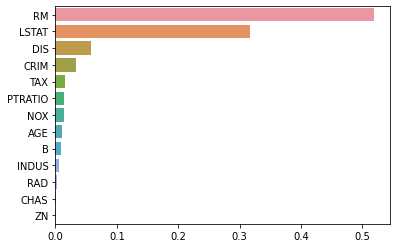

In [ ]:
sns.barplot(x = feature_series, y = feature_series.index)